In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")
import warnings
warnings.filterwarnings(action="ignore")

In [43]:
df=pd.read_csv("churn_prediction_simple.csv")
df.head()


,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


In [44]:
#sepaating dependent and independent variable
X=df.drop(columns=["churn","customer_id"])
Y=df["churn"]

In [45]:
#scaling the dataset
from sklearn.preprocessing import StandardScaler
scl=StandardScaler()
scaled_X=scl.fit_transform(X)

In [46]:
#spliting the data set
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(scaled_X,Y,train_size=0.80,stratify=Y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((17653, 19), (4414, 19), (17653,), (4414,))

In [47]:
from sklearn.tree import DecisionTreeClassifier as DTC
classifier=DTC(class_weight="balanced")
classifier=DTC()


In [48]:
classifier.fit(x_train,y_train)
predicted_values=classifier.predict(x_train)

In [49]:
predicted_values[:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [50]:
# EVALUATION OF METRICES
from sklearn.metrics import classification_report
print(classification_report(y_train,predicted_values))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14234
           1       1.00      1.00      1.00      3419

    accuracy                           1.00     17653
   macro avg       1.00      1.00      1.00     17653
weighted avg       1.00      1.00      1.00     17653



In [51]:
predict_values=classifier.predict(x_test)
print(classification_report(y_test,predict_values))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      3559
           1       0.42      0.45      0.44       855

    accuracy                           0.77      4414
   macro avg       0.64      0.65      0.65      4414
weighted avg       0.78      0.77      0.78      4414



In [54]:
#%pip install graphviz

In [53]:
#from sklearn.tree import export_graphviz as grp
#grp(decision_tree=classifier,out_file="tree_viz",
 #   max_depth=None,feature_names=X.columns, label='none', impurity=False)


from graphviz import render
render( filepath="tree_viz",format="png", engine="neato")

In [55]:
classifier=DTC()
x=classifier.fit(x_train,y_train)
x

DecisionTreeClassifier()

In [56]:
#now we are focousing on the most important concept calc_score() and effect()


# max_depth

In [57]:
from sklearn.metrics import f1_score 
def calc_score(model, x1,y1,x2,y2):
    model.fit(x1,y1)
    predict=model.predict(x1)
    f1=f1_score(y1,predict)
     
    predict=model.predict(x2)
    f2=f1_score(y2,predict)
                
    return f1,f2    

In [58]:
def effect(train_score,test_score,x_axis,title):
    plt.figure(figsize=(5,5),dpi=120)
    plt.plot(x_axis,train_score,color="red",label="train_score")
    plt.plot(x_axis,test_score,color="green",label="test_score")
    plt.title(title)
    plt.legend()
    plt.xlabel("parametric_values")
    plt.ylabel("f1_score")
    plt.show()

In [59]:
maxdepth=[i for i in range(1,50)]
train=[]
test=[]

for i in maxdepth:
    model=DTC(class_weight="balanced",max_depth=i,random_state=42)
    f1,f2=calc_score(model,x_train,y_train,x_test,y_test)
    train.append(f1)
    test.append(f2)

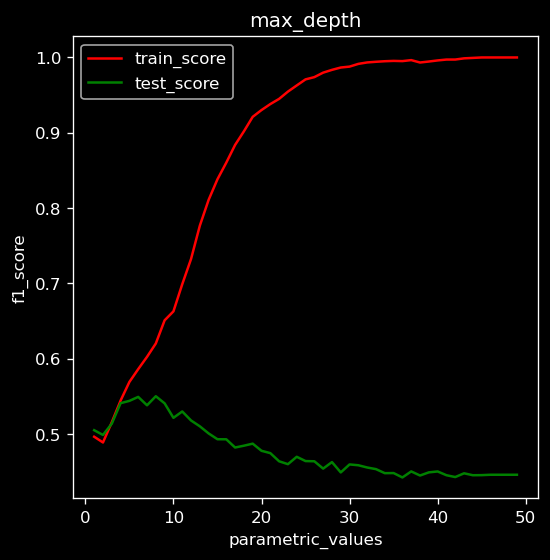

In [60]:
effect(train,test,range(1,50),"max_depth")  #overfitting model

# min_samples

In [61]:
min_sample=[i for i in range(2,5000,25)]
train=[]
test=[]

for i in min_sample:
    model=DTC(class_weight="balanced",min_samples_split=i,random_state=42)
    f1,f2=calc_score(model,x_train,y_train,x_test,y_test)
    train.append(f1)
    test.append(f2)  

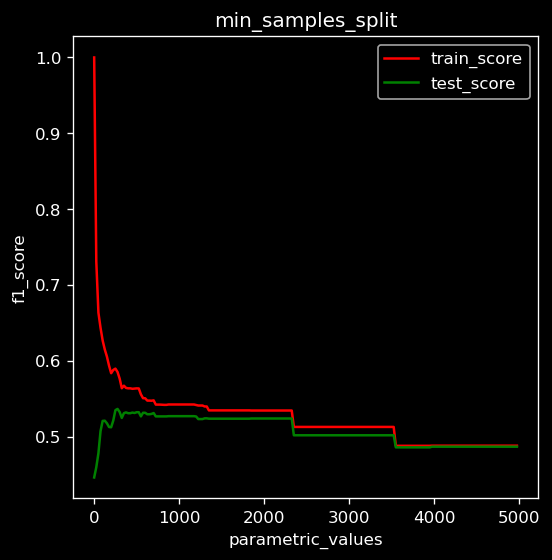

In [62]:
effect(train,test,range(2,5000,25),"min_samples_split") #overfitting(as start from high level)

In [63]:
max_leaf=[i for i in range(20,200,10)]
train=[]
test=[]
for i in max_leaf:
    model=DTC(class_weight="balanced",max_leaf_nodes=i,random_state=58)
    f1,f2=calc_score(model,x_train,y_train,x_test,y_test)
    train.append(f1)
    test.append(f2)

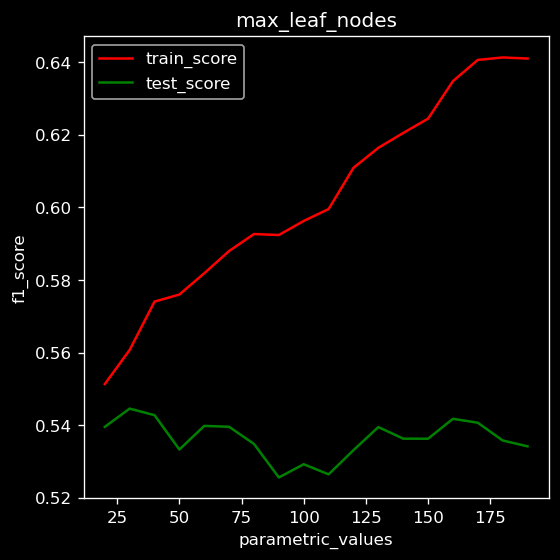

In [64]:
effect(train,test,range(20,200,10),"max_leaf_nodes")  #over fitting

In [65]:
#feature scaling
model=DTC(max_depth=9)
model.fit(x_train,y_train)
feature_imp=pd.Series(model.feature_importances_,index=X.columns)
k=feature_imp.sort_values()

Text(0.5, 1.0, 'feature importance')

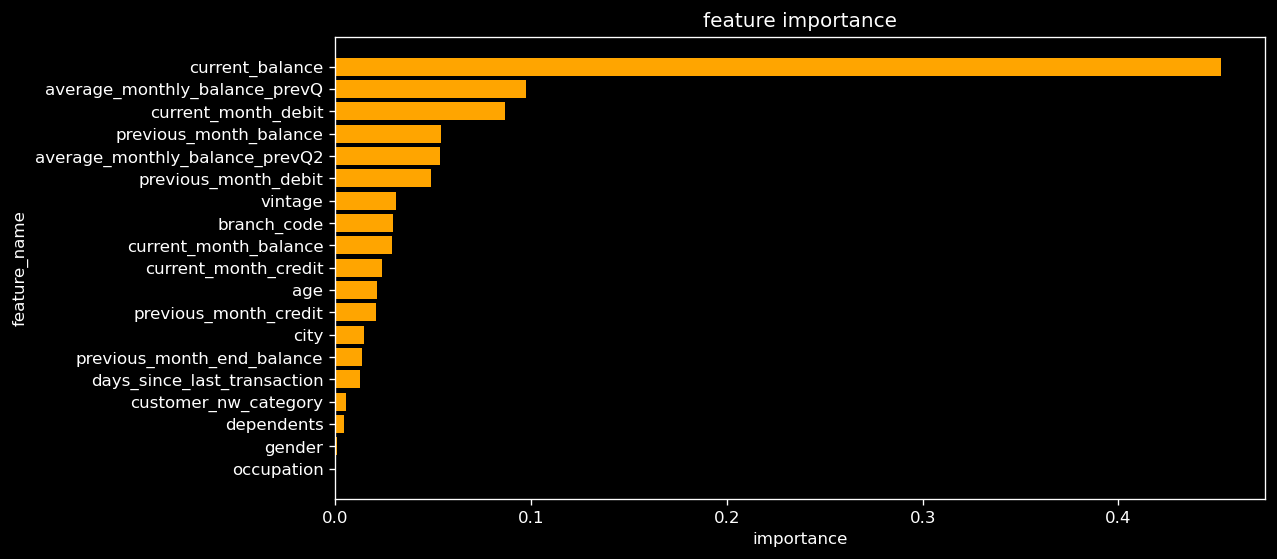

In [66]:
plt.figure(dpi=120,figsize=(10,5))
plt.barh(k.index, k,color="orange")
plt.xlabel("importance")
plt.ylabel("feature_name")
plt.title("feature importance")

# ensembe the models

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22067 entries, 0 to 22066
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   gender                          22067 non-null  int64  
 4   dependents                      22067 non-null  float64
 5   occupation                      22067 non-null  int64  
 6   city                            22067 non-null  float64
 7   customer_nw_category            22067 non-null  int64  
 8   branch_code                     22067 non-null  int64  
 9   days_since_last_transaction     22067 non-null  float64
 10  current_balance                 22067 non-null  float64
 11  previous_month_end_balance      22067 non-null  float64
 12  average_monthly_balance_prevQ   

In [67]:
# we are goingto repeat the model classification
#separating the dependent variable
X=df.drop(columns=["churn","customer_id"])
Y=df["churn"]

In [68]:
#standardising the dataset
from sklearn.preprocessing import StandardScaler
scl=StandardScaler()
scl_X=scl.fit_transform(X)

In [69]:
#training the dataset
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(scl_X,Y,train_size=0.80,stratify=Y,random_state=101)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((17653, 19), (17653,), (4414, 19), (4414,))

In [70]:
print(x_train.shape, y_train.shape)

(17653, 19) (17653,)


In [71]:
#ensemble
from sklearn.ensemble import BaggingClassifier as BC
classifier=BC()
classifier.fit(x_train,y_train)
#it can provide you with the some of the jobs

BaggingClassifier()

In [72]:
from sklearn.linear_model import LogisticRegression as LR
classifier=BC(estimator=LR(),
               n_estimators=150,
               n_jobs=-1, random_state=42)
classifier.fit(x_train,y_train)
predicted_values=classifier.predict(x_train)

# RANDOM FOREST

In [75]:
from sklearn.ensemble import RandomForestClassifier as RFC
classifier = RFC(n_estimators=100, random_state=42)
classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [76]:
y_pred = classifier.predict(x_test)

In [77]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.859311282283643
Confusion Matrix:
 [[3408  151]
 [ 470  385]]
